# **Data Wrangling:**
Handle missing values.

Remove duplicates.

Correct data types.

Normalize and scale data.

# **Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Data**

In [ ]:
df = pd.read_csv('titanic_data.csv')

df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket    Fare Embarked  
0      0         A/5 21171   $7.25        S  
1      0          PC 17599  $71.28        C  
2      0  STON/O2. 3101282   $7.93        S  
3      0            113803  $53.10        S  
4      0            373450   $8.05        S

# **Check for missing values:**

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             6
Embarked         2
dtype: int64

In [ ]:
df.shape

(891, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         885 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB


In [ ]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp       Parch
count   891.000000  891.000000  891.000000  714.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642   29.699118    0.523008    0.381594
std     257.353842    0.486592    0.836071   14.526497    1.102743    0.806057
min       1.000000    0.000000    1.000000    0.420000    0.000000    0.000000
25%     223.500000    0.000000    2.000000   20.125000    0.000000    0.000000
50%     446.000000    0.000000    3.000000   28.000000    0.000000    0.000000
75%     668.500000    1.000000    3.000000   38.000000    1.000000    0.000000
max     891.000000    1.000000    3.000000   80.000000    8.000000    6.000000

<Axes: >

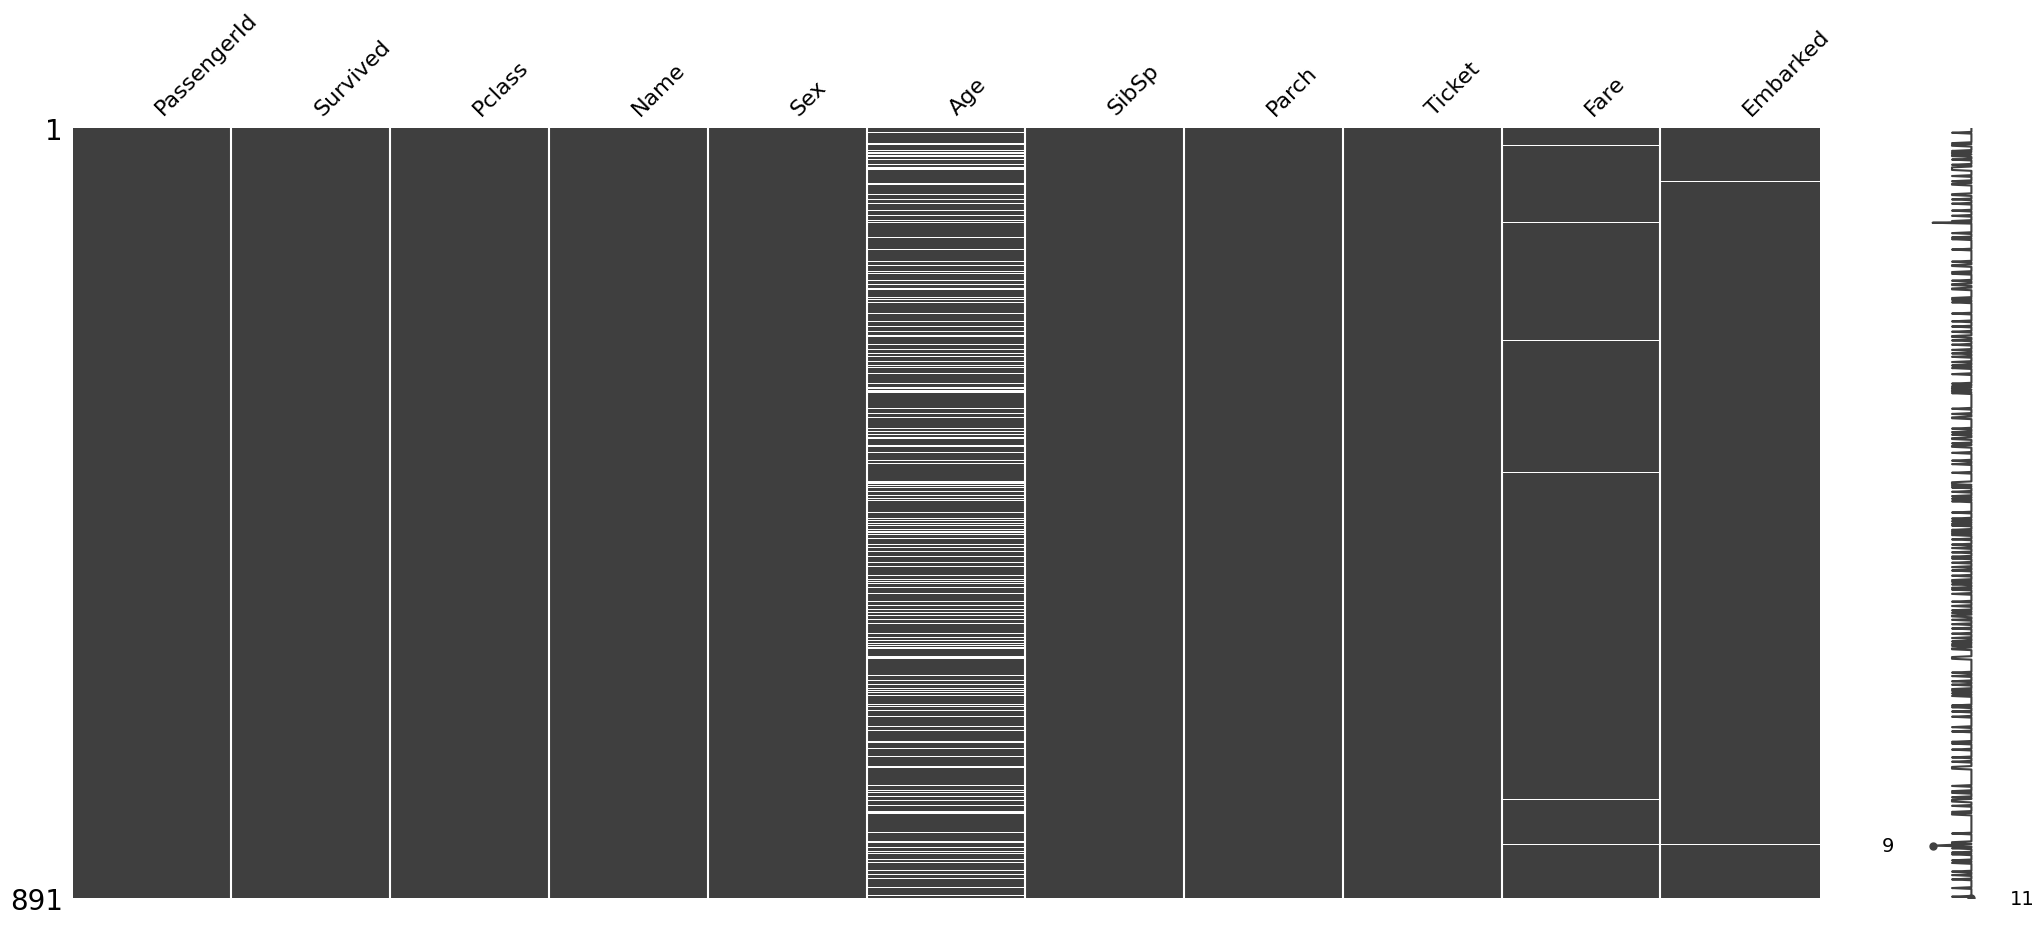

In [ ]:
import missingno as mp
mp.matrix(df)

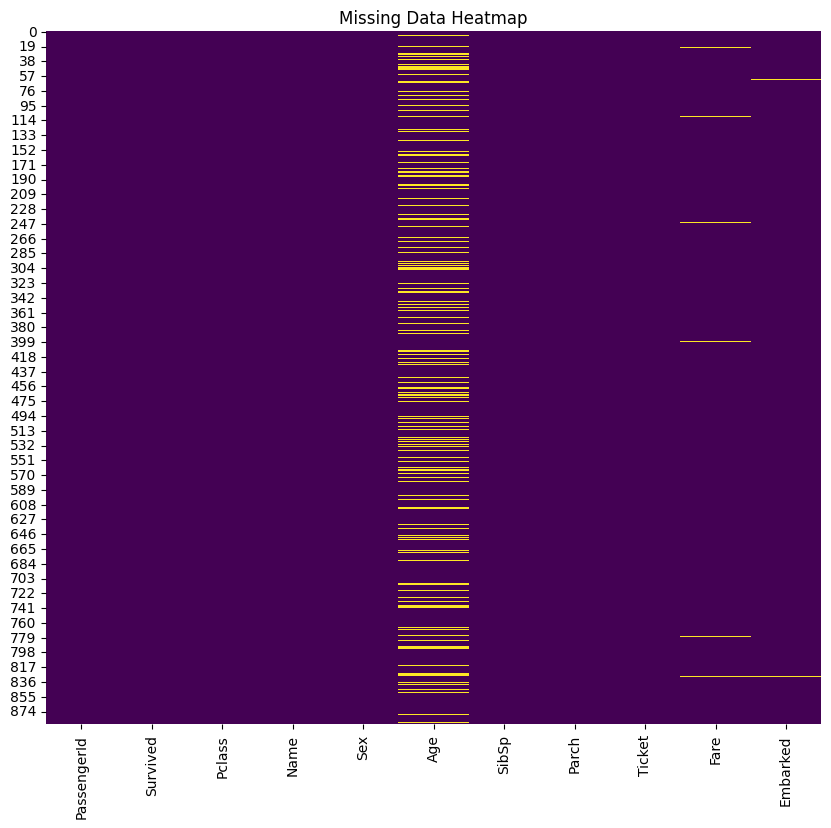

In [ ]:
plt.figure(figsize=(10, 9))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [ ]:
titanic = df.drop('Age', axis=1)
# Note: axis=1 for column and axis=0 for row

print(titanic.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    male      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                             Heikkinen, Miss. Laina  female      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                           Allen, Mr. William Henry    male      0      0   

             Ticket    Fare Embarked  
0         A/5 21171   $7.25        S  
1          PC 17599  $71.28        C  
2  STON/O2. 3101282   $7.93        S  
3            113803  $53.10        S  
4            373450   $8.05        S  


In [ ]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket    Fare Embarked  
0        0         A/5 21171   $7.25        S  
1        0          PC 17599  $71.28        C  
2        0  STON/O2. 3101282   $7.93        S  
3        0            113803  $53.10        S  
4        0            373450   $8.05        S  
..     ...               ...     ...      ...  
886      0            211536  $13.00        S  
887      0            112053  $30.00        S  
888      2        W./C. 6607  $23.45        S  
889      0            111369  $30.00        C  
890      0            370376   $7.75        Q  

[891 rows x 11 columns]

In [ ]:
# Drop multiple columns, e.g., 'age' and 'embarked'
titanic = df.drop(['Age', 'Embarked'], axis=1)

(titanic.head())


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    male      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                             Heikkinen, Miss. Laina  female      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                           Allen, Mr. William Henry    male      0      0   

             Ticket    Fare  
0         A/5 21171   $7.25  
1          PC 17599  $71.28  
2  STON/O2. 3101282   $7.93  
3            113803  $53.10  
4            373450   $8.05

In [ ]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket    Fare Embarked  
0        0         A/5 21171   $7.25        S  
1        0          PC 17599  $71.28        C  
2        0  STON/O2. 3101282   $7.93        S  
3        0            113803  $53.10        S  
4        0            373450   $8.05        S  
..     ...               ...     ...      ...  
886      0            211536  $13.00        S  
887      0            112053  $30.00        S  
888      2        W./C. 6607  $23.45        S  
889      0            111369  $30.00        C  
890      0            370376   $7.75        Q  

[891 rows x 11 columns]

In [ ]:
# Drop 'age' column in place (modifies the original DataFrame)
df.drop('Age', axis=1, inplace=True)

df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    male      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                             Heikkinen, Miss. Laina  female      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                           Allen, Mr. William Henry    male      0      0   

             Ticket    Fare Embarked  
0         A/5 21171   $7.25        S  
1          PC 17599  $71.28        C  
2  STON/O2. 3101282   $7.93        S  
3            113803  $53.10        S  
4            373450   $8.05        S

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           6
Embarked       2
dtype: int64

In [ ]:
# Drop rows with any null values
# df_cleaned = df.dropna()

# If you want to drop rows where a specific column has null values, use:
df_cleaned = df.dropna(subset=['Embarked'])

df_cleaned.isnull().sum()

# To modify the original DataFrame in place (without creating a new one):
# df.dropna(inplace=True)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           5
Embarked       0
dtype: int64

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           6
Embarked       2
dtype: int64

In [ ]:
 df.dropna(subset=['Embarked'], inplace=True)
 df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           5
Embarked       0
dtype: int64

In [ ]:
# Remove the '$' sign and convert 'Fare' column to numeric
df['Fare'] = df['Fare'].replace({'\$': ''}, regex=True)

# Convert the 'fare' column to a numeric type (float) using astype()
df['Fare'] = df['Fare'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         884 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 76.4+ KB


In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           5
Embarked       0
dtype: int64

In [ ]:
# Fill missing values and modify the original DataFrame
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Check the original DataFrame
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-288-66bc8fcc0d17>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].median(), inplace=True)


In [ ]:
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

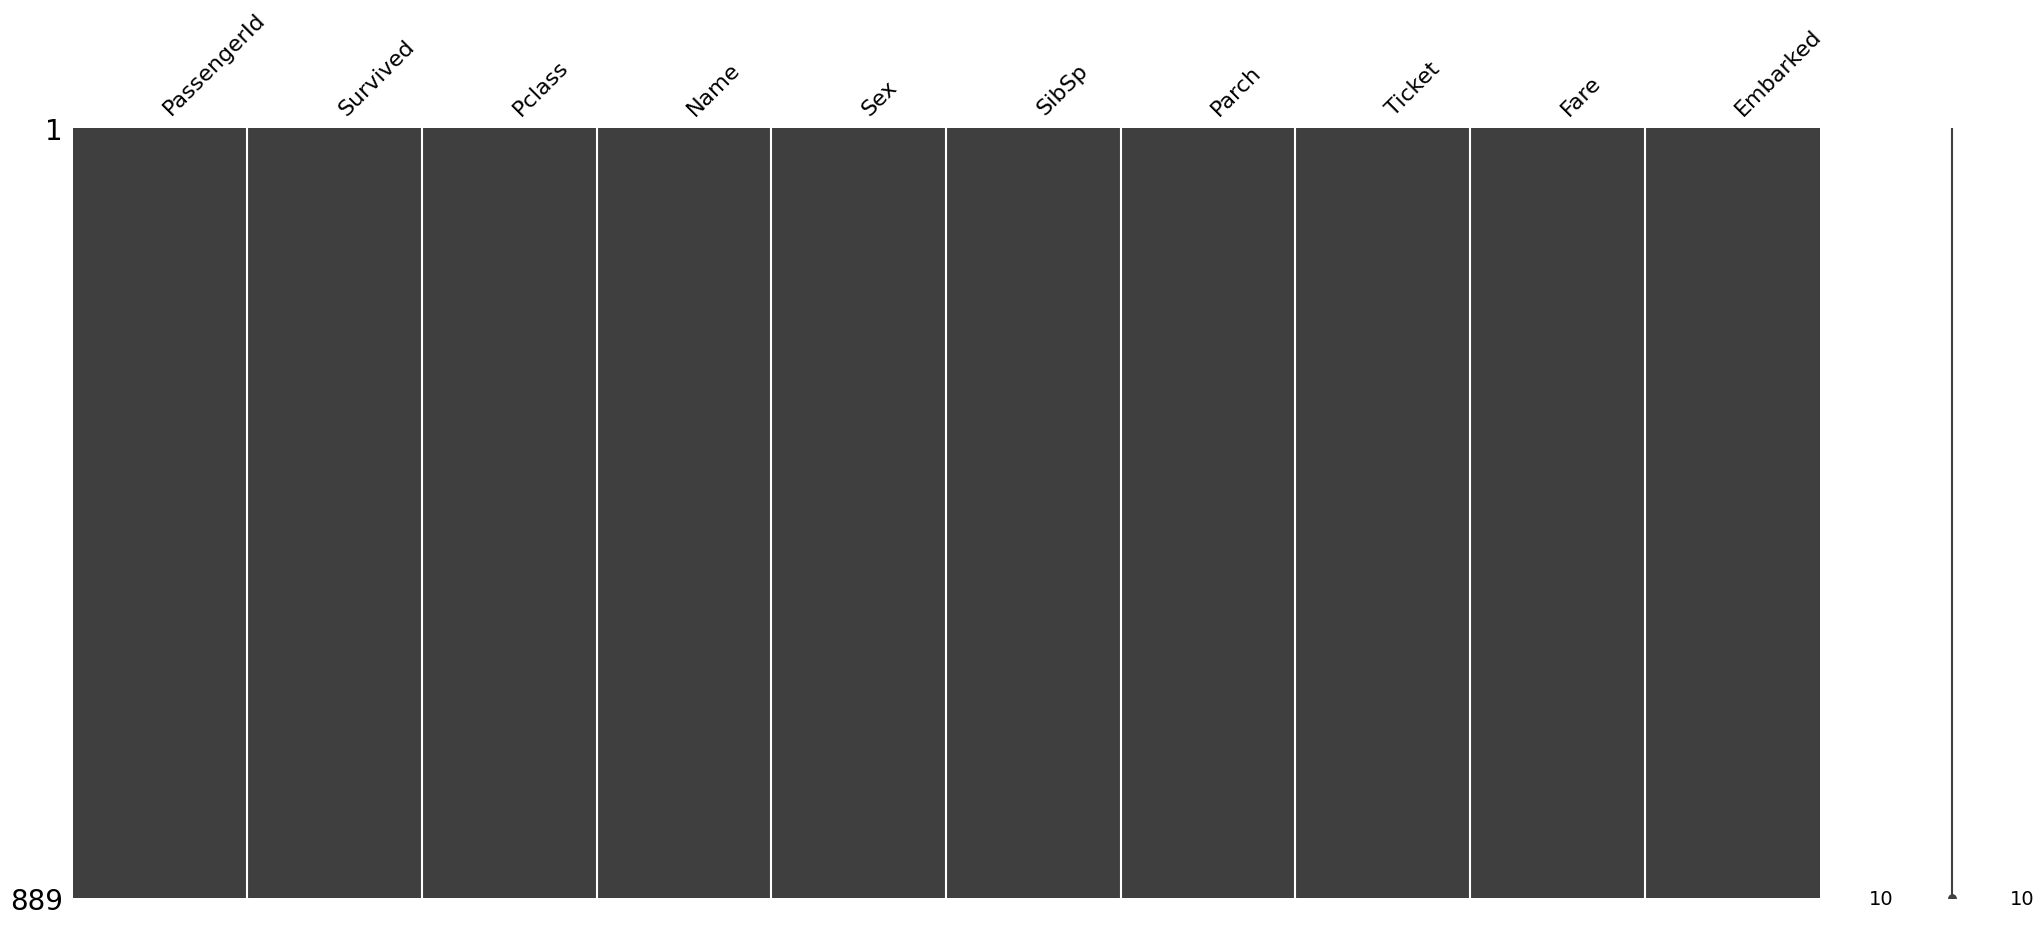

In [ ]:
mp.matrix(df)

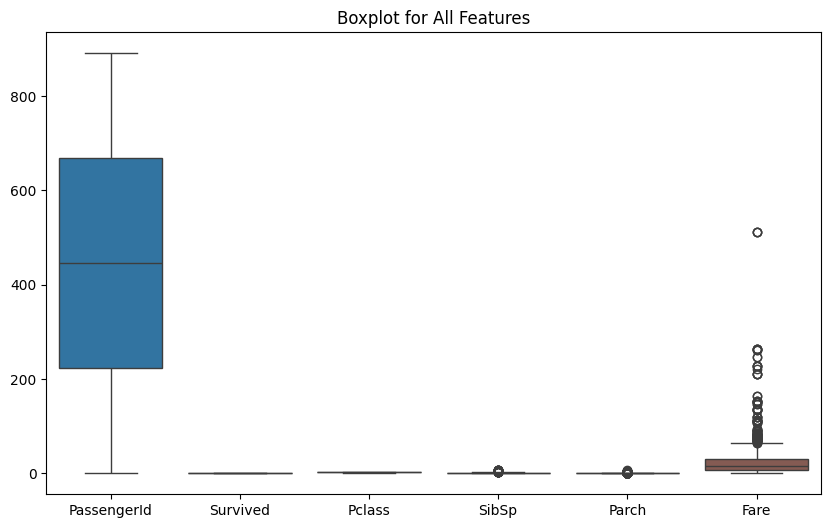

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot for All Features")
plt.show()

<Axes: xlabel='Fare', ylabel='Count'>

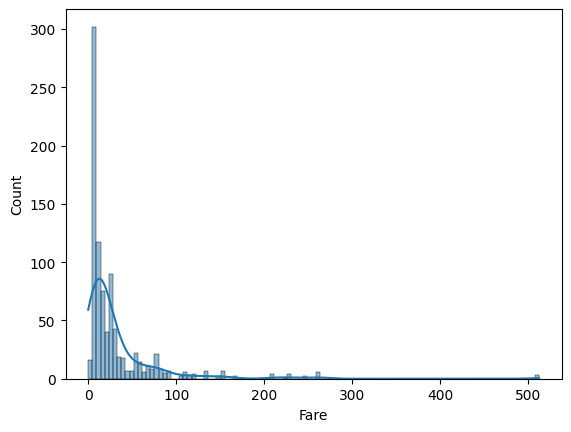

In [ ]:
sns.histplot(df['Fare'],kde=True)

<Axes: xlabel='fare_robust_scaled', ylabel='Count'>

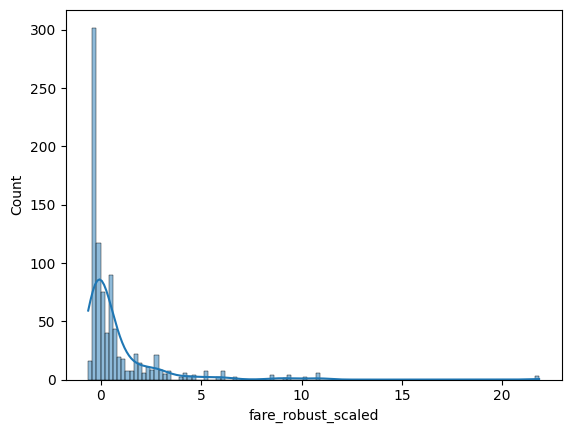

In [ ]:
from sklearn.preprocessing import RobustScaler

# Apply RobustScaler
scaler = RobustScaler()
df['fare_robust_scaled'] = scaler.fit_transform(df[['Fare']])

sns.histplot(df['fare_robust_scaled'],kde=True)


<Axes: xlabel='fare_MinMax_scaled', ylabel='Count'>

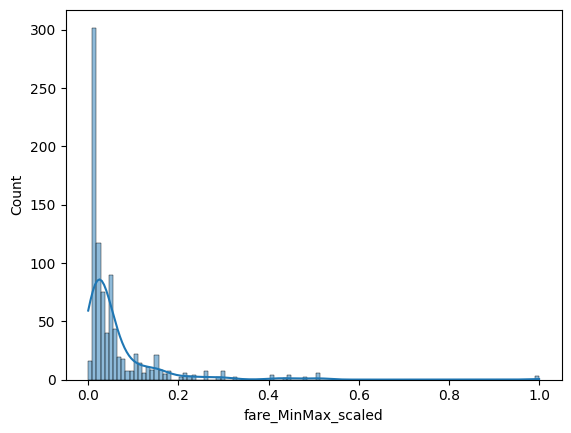

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Apply MinMaxScaler
scaler = MinMaxScaler()
df['fare_MinMax_scaled'] = scaler.fit_transform(df[['Fare']])

sns.histplot(df['fare_MinMax_scaled'],kde=True)


<Axes: xlabel='fare_StandardScaler_scaled', ylabel='Count'>

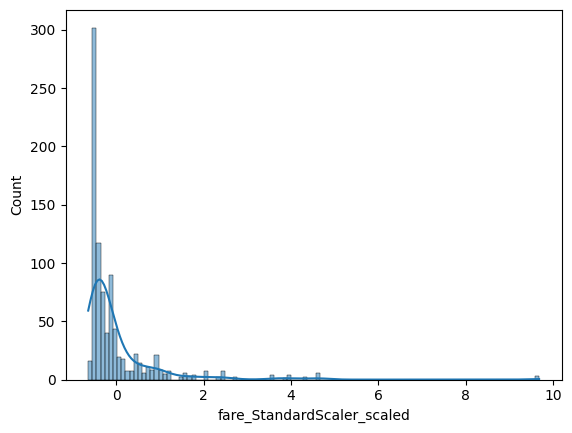

In [ ]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler
scaler = StandardScaler()
df['fare_StandardScaler_scaled'] = scaler.fit_transform(df[['Fare']])

sns.histplot(df['fare_StandardScaler_scaled'],kde=True)


<Axes: xlabel='fare_log_transformed', ylabel='Count'>

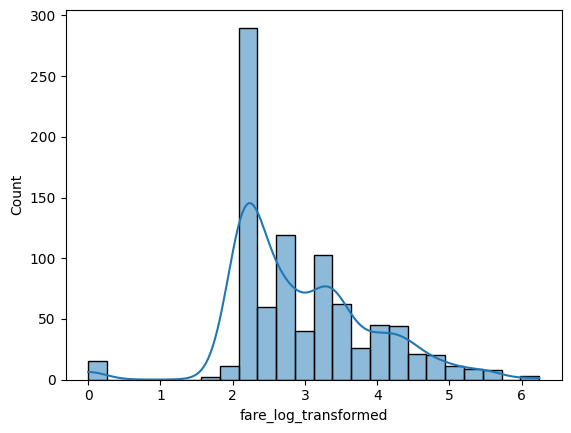

In [ ]:
import numpy as np

df['fare_log_transformed'] = np.log1p(df['Fare'])  # log1p handles log(0) issues

sns.histplot(df['fare_log_transformed'],kde=True)


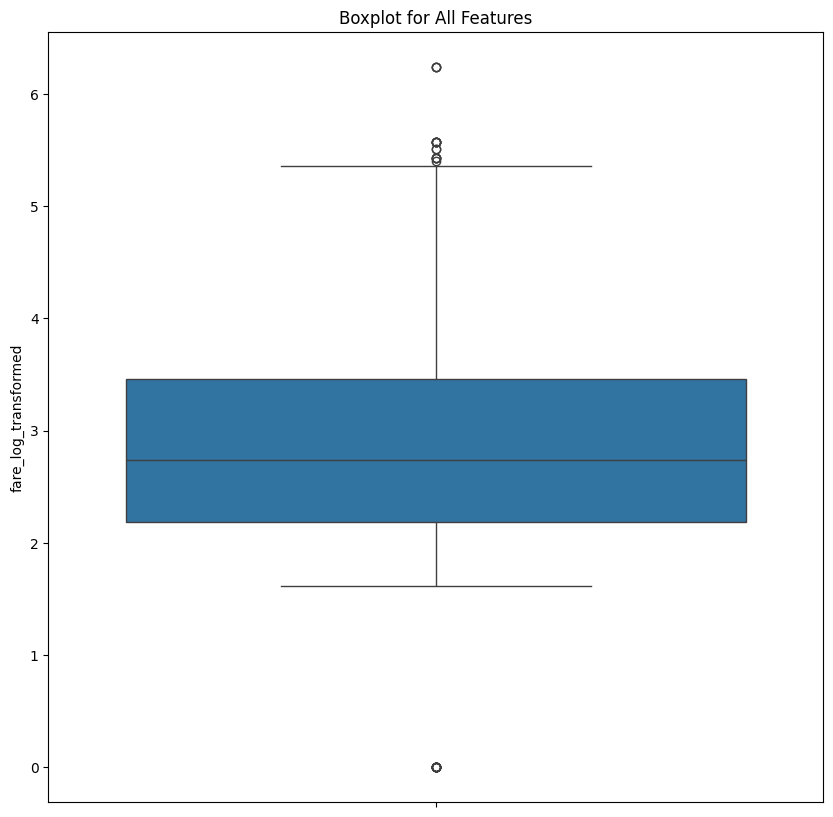

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df['fare_log_transformed'])
plt.title("Boxplot for All Features")
plt.show()

# **Removing Duplicates**

In [ ]:
# If you want to remove rows where all attributes are exactly the same (e.g., two identical people with the same name, age, and address), you can use:

# df_no_duplicates = df.drop_duplicates()

# Remove duplicates based on 'PassengerId' column in place

# df.drop_duplicates(subset=['PassengerId'], inplace=True)

In [ ]:
df_cleaned={
    'PassengerId': [1, 1, 3, 4, 1],
    'Survived': [0, 0, 0, 1, 0],
    'Pclass': [3, 3, 3, 1, 3],
    'Name': ['John Doe', 'nepal Doe', 'John Doe', 'Alice Johnson', 'Bob Brown'],
    'Sex': ['male', 'male', 'male', 'female', 'male'],
}

df_clean= pd.DataFrame(df_cleaned)
df_clean

PassengerId  Survived  Pclass           Name     Sex
0            1         0       3       John Doe    male
1            1         0       3      nepal Doe    male
2            3         0       3       John Doe    male
3            4         1       1  Alice Johnson  female
4            1         0       3      Bob Brown    male

In [ ]:
df_no_duplicates = df_clean.drop_duplicates(ignore_index=True)
df_no_duplicates

PassengerId  Survived  Pclass           Name     Sex
0            1         0       3       John Doe    male
1            3         0       3       John Doe    male
2            4         1       1  Alice Johnson  female
3            5         0       3      Bob Brown    male

In [ ]:
df_clean

PassengerId  Survived  Pclass           Name     Sex
0            1         0       3       John Doe    male
1            1         0       3       Jane Doe    male
2            3         0       3       John Doe    male
3            4         1       1  Alice Johnson  female
4            5         0       3      Bob Brown    male

In [ ]:
df_clean.drop_duplicates(subset=['PassengerId'], inplace=True)
df_clean

PassengerId  Survived  Pclass           Name     Sex
0            1         0       3       John Doe    male
2            3         0       3       John Doe    male
3            4         1       1  Alice Johnson  female

In [ ]:
import pandas as pd

data = {
  "name": ["Sally", "Mary", "John", "Mary"],
  "age": [50, 40, 30, 40],
  "qualified": [True, False, False, False]
}

df = pd.DataFrame(data)

newdf = df.drop_duplicates()

print(newdf)

    name  age  qualified
0  Sally   50       True
1   Mary   40      False
2   John   30      False


In [ ]:
!pip install ydata-profiling --q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 58.7 MB/s eta 0:00:00


In [ ]:
from ydata_profiling import ProfileReport

report = ProfileReport(df)
report.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]